**ML - Fall 2023 - Practical 4**

**Support Vector Machine**

**Student Name:**  Amirhossein Alamdar<br>
**Student Number:** 400105144

# P0: Intro

Sentiment Analysis is a Natural Language Processing technique that allows us to determine the sentiment or opinion of a given text. It is a very useful technique that allows us to extract insights from social media, customer feedback, product reviews, etc. This assignment focuses on building a sentiment classifier using the SVM algorithm. You are given a dataset of tweets along with their corresponding sentiments. Your task is to build a classifier that can determine the sentiment of a given tweet.

# P1: Data Exploration

The dataset provided to you includes one file: `sentiment.csv`.
Run the below cells to download the data.

In [1]:
!pip install gdown

In [2]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1XHeTYh-jGBHq1lpbOVq1HX-N4EsUIQgA'
path = 'sentiment.csv'
gdown.download(url, path, quiet=True)
data = pd.read_csv(path, encoding = "ISO-8859-1")
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## The Distribution of Labels

Extract the labels of the Sentiment column and plot the distribution of samples according to it. **(P1-1: 2.5 points)**

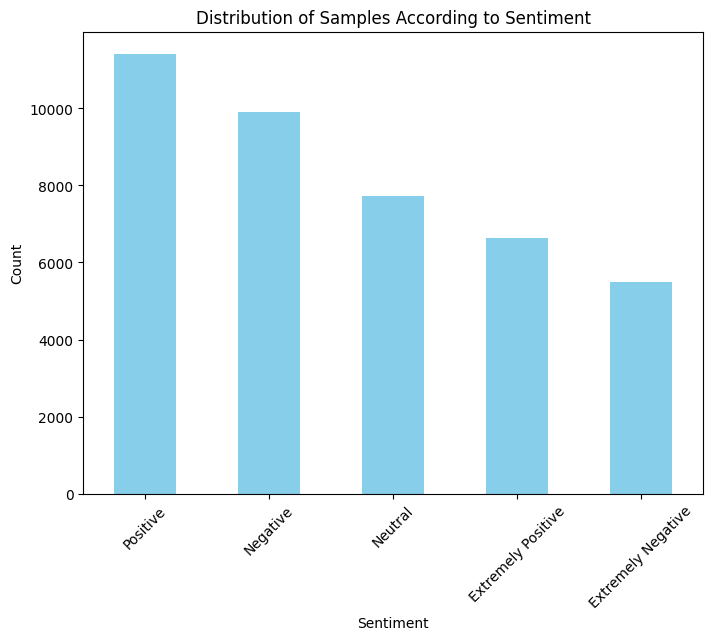

In [3]:
import matplotlib.pyplot as plt

sentiment_column = 'Sentiment'

# Extract the labels of the Sentiment column
sentiment_labels = data[sentiment_column]

# Plot the distribution of samples according to sentiment
sentiment_counts = sentiment_labels.value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Samples According to Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Texts Distribution

Plot the distribution of tweets according to their lengths. **(P1-2: 2.5 points)**

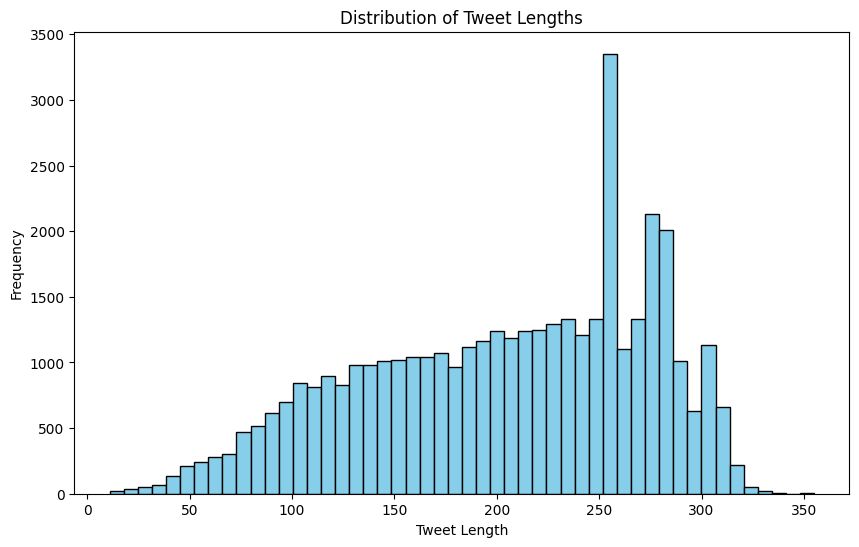

In [4]:
tweet_column = 'OriginalTweet'

# Calculate the length of each tweet and create a new column
Tweet_Length = data[tweet_column].apply(len)

# Plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))
plt.hist(Tweet_Length, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

## Outliers

According to the obtained distributions, reason whether it is necessary to remove outliers or not. If your answer is yes, determine the appropriate remove range and delete these outliers in the dataset cleaning section. **(P1-3: 5 points)**

## Missing Values

What percentage of dataset rows should be deleted due to missing values? Delete these row in the dataset cleaning section. **(P1-4: 2.5 points)**

In [5]:
# Count the number of missing values in each row
missing_values_per_row = data.isnull().sum(axis=1)

# Count the number of rows containing missing values
missing_rows = missing_values_per_row[missing_values_per_row > 0]
print(round(len(missing_rows) / len(data) * 100, 2), '%')


# most of this null values are not because of OriginalTweet column
# therfore just a small portion will get deleted


20.87 %


## Most Frequent Words

Use the `nltk` library and plot the 30 most frequent words in order of occurrence. Then do this for each set of positive, negative and neutral tweets separately. **(P1-5: 10 points)**

In [6]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')

def filter(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return filtered_tokens

# Apply the function to each row in the DataFrame
filtered = data['OriginalTweet'].apply(filter)
total_tokens = filtered.tolist()
flat_tokens = [word for sublist in total_tokens for word in sublist]

word_freq = FreqDist(flat_tokens)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


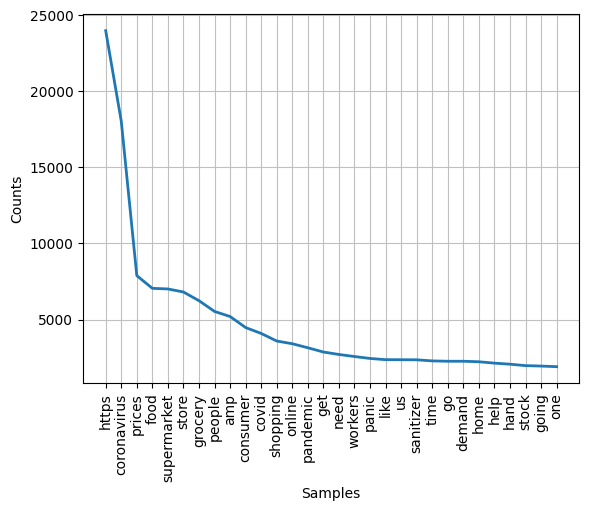

In [7]:
word_freq.plot(30, cumulative=False)

# P2: Preprocessing

## Dataset Cleaning

Remove unrelevant columns and do other necessary cleanings. **(P2-1: 5 points)**

In [8]:
data = data[['OriginalTweet', 'Sentiment']]
data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


## Labeling

Based on the `Sentiment` column, generate 3 labels by considering the extremely positive tweets as positive and the extremely negative ones as negatives. **(P2-2: 2.5 points)**

In [9]:
def map_2_pn(text):
    if text == 'Extremely Negative':
        return 'Negative'
    elif text == 'Extremely Positive':
        return 'Positive'
    else:
        return text
    
data['Sentiment'] = data['Sentiment'].apply(map_2_pn)
data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


## Text Cleaning

Remove urls from tweets with regex. (Use pattern `r'https?://\S+|www\.\S+'`) **(P2-3: 2.5 points)**

In [10]:
import re
def remove_stopwords(words, stop):
    return [word for word in words if word not in stop_words]
def tokenize_text(text):
    return word_tokenize(text)
def remove(text, pattern):
    return  re.sub(pattern, '', text)
def join_text(words):
    return ' '.join(words)
def lower(text):
    return text.lower()
def stemmer(words, ps):
    return [ps.stem(word) for word in words]

In [11]:
data['OriginalTweet'] = data['OriginalTweet'].apply(remove,pattern = r'https?://\S+|www\.\S+')
data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv and and,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


Remove everything except alphabetical and numerical characters. (Use pattern `[^a-zA-Z0-9]`) **(P2-4: 2.5 points)**

In [12]:
data['OriginalTweet'] = data['OriginalTweet'].apply(remove, pattern = '[^a-zA-Z0-9\s]')
data

,OriginalTweet,Sentiment
0,MeNyrbie PhilGahan Chrisitv and and,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elder...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COVID...,Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Negative
41154,You know its getting tough when KameronWilds ...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


Lower all letters. Then use `nltk` and tokenize tweets. Then replace each word with its root and remove the stopwords. **(P2-5: 10 points)**

In [13]:
data['OriginalTweet'] = data['OriginalTweet'].apply(lower)
data

,OriginalTweet,Sentiment
0,menyrbie philgahan chrisitv and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the covid...,Negative
...,...,...
41152,airline pilots offering to stock supermarket s...,Neutral
41153,response to complaint not provided citing covi...,Negative
41154,you know its getting tough when kameronwilds ...,Positive
41155,is it wrong that the smell of hand sanitizer i...,Neutral


In [14]:
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

data['OriginalTweet'] = data['OriginalTweet'].apply(tokenize_text)
data['OriginalTweet'] = data['OriginalTweet'].apply(remove_stopwords, stop=stop_words)

ps = PorterStemmer()
data['OriginalTweet'] = data['OriginalTweet'].apply(stemmer, ps =ps)
data


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,OriginalTweet,Sentiment
0,"[menyrbi, philgahan, chrisitv]",Neutral
1,"[advic, talk, neighbour, famili, exchang, phon...",Positive
2,"[coronaviru, australia, woolworth, give, elder...",Positive
3,"[food, stock, one, empti, pleas, dont, panic, ...",Positive
4,"[readi, go, supermarket, covid19, outbreak, im...",Negative
...,...,...
41152,"[airlin, pilot, offer, stock, supermarket, she...",Neutral
41153,"[respons, complaint, provid, cite, covid19, re...",Negative
41154,"[know, get, tough, kameronwild, ration, toilet...",Positive
41155,"[wrong, smell, hand, sanit, start, turn, coron...",Neutral


In [15]:
data['OriginalTweet'] = data['OriginalTweet'].apply(join_text)
data

,OriginalTweet,Sentiment
0,menyrbi philgahan chrisitv,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronaviru australia woolworth give elderli di...,Positive
3,food stock one empti pleas dont panic enough f...,Positive
4,readi go supermarket covid19 outbreak im paran...,Negative
...,...,...
41152,airlin pilot offer stock supermarket shelv nz ...,Neutral
41153,respons complaint provid cite covid19 relat de...,Negative
41154,know get tough kameronwild ration toilet paper...,Positive
41155,wrong smell hand sanit start turn coronaviru c...,Neutral


## Feature Generation

Use `CountVectorizer` class (belonging to `sklearn`) construct a feature vector from each tweet. **(P2-6: 5 points)**

In [16]:
from sklearn.model_selection import train_test_split

X = data['OriginalTweet'].values
y = data['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000)

X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_train_vect.shape

(32925, 1000)

In [18]:
X_test_vect = vectorizer.transform(X_test).toarray()
X_test_vect.shape

(8232, 1000)

In [19]:
import numpy as np
def mapping(x):
    if x == 'Negative':
        return 0
    elif x == 'Neutral':
        return 1
    elif x == 'Positive':
        return 2
    else:
        assert False, 'wrong labels!'
        
np_mapping = np.vectorize(mapping)
y_test = np_mapping(y_test)
y_train = np_mapping(y_train)

# P3: Modeling

Convert the dataset to a dataframe (or some `numpy` arrays) and split it into train and test sets. **(P3-1: 5 points)**

In [20]:
# already done

Use the `SVC` class (belonging to `sklearn`) to train a SVM classifier. (**P3-2: 5 points**)

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svc_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
svc_classifier.fit(X_train_vect, y_train)

# Make predictions on the test data
y_pred = svc_classifier.predict(X_test_vect)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


Complete the definition of the following class to implement a SVM classifier capable of separating only the positive and negative classes. **(P3-3: 15 points)**


In [22]:
class SVM:
    def __init__(self):
        pass

    def fit(self, X, y):
        """Fit the SVM model to dataset X.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where `n_samples` is the number of samples
            and `n_features` is the number of features.
        
        y : array-like of shape (n_samples,)
            Training labels, where `n_samples` is the number of samples.

        Returns
        -------
        self : object
            Returns the instance itself.
        """

        ############ Your Code ############
        # STEPS
        # 1. Setup SVM objective function in QP form 
        # 2. Solve the QP problem and get the optimal lagrange multipliers
        # 3. Get support vectors and calculate the weight vector

        return self
    
    def transform(self, X):
        """Fit the model with X and apply the dimensionality reduction on X.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where `n_samples` is the number of samples
            and `n_features` is the number of features.

        Returns
        -------
        y_pred : ndarray of shape (n_samples)
            Your predictions for the class of each sample
        """
        
        ############ Your Code ############

        pass

In [45]:
import numpy as np
from scipy.optimize import minimize

class SVM:
    def __init__(self, C=1.0):
        self.C = C  # Regularization parameter
        self.support_vectors = None
        self.weights = None
        self.bias = None

    def _objective_function(self, alpha, X, y):
        """Objective function for SVM in the dual form."""
        n_samples, n_features = X.shape
        term1 = 0.5 * np.sum(alpha ** 2)
        term2 = -np.sum(alpha)
        term3 = 0.5 * np.sum(alpha[:, None] * alpha[None, :] * y[:, None] * y[None, :] * np.dot(X, X.T))
        return term1 + term2 + term3

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Define constraints for the minimization problem
        constraints = [{'type': 'eq', 'fun': lambda alpha: np.dot(alpha, y)}]
        bounds = [(0, self.C) for _ in range(n_samples)]

        # Initialize alpha (Lagrange multipliers) with zeros
        alpha_init = np.zeros(n_samples)

        # Minimize the objective function using the Sequential Least SQuares Programming (SLSQP) solver
        result = minimize(self._objective_function, alpha_init, args=(X, y),
                          method='SLSQP', bounds=bounds, constraints=constraints)

        # Extract the optimal lagrange multipliers
        alpha_optimal = result.x

        # Identify support vectors (non-zero lagrange multipliers)
        support_vector_indices = np.where(alpha_optimal > 1e-5)[0]
        self.support_vectors = X[support_vector_indices]
        support_vector_labels = y[support_vector_indices]

        # Calculate the weight vector and bias
        self.weights = np.sum(alpha_optimal * support_vector_labels[:, None] * self.support_vectors, axis=0)
        self.bias = np.mean(support_vector_labels - np.dot(self.support_vectors, self.weights))

        return self

    def transform(self, X):
        # Make predictions for new data
        y_pred = np.sign(np.dot(X, self.weights) + self.bias)
        return y_pred


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SVM:
    def __init__(self, C=1.0, tol=1e-3, max_iter=100):
        self.C = C  # regularization parameter
        self.tol = tol  # tolerance for stopping criteria
        self.max_iter = max_iter  # maximum number of iterations
        self.alpha = None  # Lagrange multipliers
        self.support_vectors = None
        self.support_vector_labels = None
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize Lagrange multipliers
        self.alpha = np.zeros(n_samples)
        self.b = 0

        # SMO optimization
        for _ in range(self.max_iter):
            num_changed_alphas = 0
            for i in range(n_samples):
                E_i = self.decision_function(X[i]) - y[i]

                # Check if the sample violates the KKT conditions
                if (y[i] * E_i < -self.tol and self.alpha[i] < self.C) or \
                   (y[i] * E_i > self.tol and self.alpha[i] > 0):
                    j = self.select_random_index(i, n_samples)
                    E_j = self.decision_function(X[j]) - y[j]

                    # Save the old alpha values
                    alpha_i_old, alpha_j_old = self.alpha[i], self.alpha[j]

                    # Compute the bounds for alpha[j]
                    if y[i] != y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])

                    if L == H:
                        continue

                    # Compute the kernel values
                    K_ii = np.dot(X[i], X[i])
                    K_ij = np.dot(X[i], X[j])
                    K_jj = np.dot(X[j], X[j])

                    # Update alpha[j]
                    self.alpha[j] = self.alpha[j] - y[j] * (E_i - E_j) / (K_ii + K_jj - 2 * K_ij)

                    # Clip alpha[j] to the bounds [L, H]
                    self.alpha[j] = np.clip(self.alpha[j], L, H)

                    # Check if alpha[j] has changed significantly
                    if np.abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    # Update alpha[i] using the same formula
                    self.alpha[i] = self.alpha[i] + y[i] * y[j] * (alpha_j_old - self.alpha[j])

                    # Update the bias term
                    b1 = self.b - E_i - y[i] * (self.alpha[i] - alpha_i_old) * K_ii \
                         - y[j] * (self.alpha[j] - alpha_j_old) * K_ij
                    b2 = self.b - E_j - y[i] * (self.alpha[i] - alpha_i_old) * K_ij \
                         - y[j] * (self.alpha[j] - alpha_j_old) * K_jj

                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2

                    num_changed_alphas += 1

            if num_changed_alphas == 0:
                break

        # Get support vectors and calculate the weight vector
        self.support_vectors = X[self.alpha > 0]
        self.support_vector_labels = y[self.alpha > 0]
        self.w = np.dot(self.alpha * self.support_vector_labels, self.support_vectors)

        return self

    def decision_function(self, X):
        return np.dot(X, self.w) + self.b

    def predict(self, X):
        return np.sign(self.decision_function(X))

    def select_random_index(self, i, n_samples):
        j = i
        while j == i:
            j = np.random.randint(0, n_samples)
        return j

# Example usage:
# Create synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y[y == 0] = -1  # Convert 0 labels to -1

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm = SVM(C=1.0, tol=1e-3, max_iter=100)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Train the binary SVM classifier using the class you have implemented. **(P3-4: 5 points)**

In [33]:
X_train_pn = X_train_vect[y_train != 1]
y_train_pn = y_train[y_train != 1]

X_test_pn = X_test_vect[y_test != 1]
y_test_pn = y_test[y_test != 1]

def tr(x):
    if x == 2:
        return 1
    return x

np_mapping = np.vectorize(tr)
y_train_pn = np_mapping(y_train_pn)
y_test_pn = np_mapping(y_test_pn)
print(y_train_pn.shape, y_train_pn[:10])

(26765,) [0 0 0 0 0 1 1 1 1 0]


In [ ]:
model = SVM()
model.fit(X_train_pn, y_train_pn)
model_pred = model.transform(X_test_pn)

# P4: Evaluation

Using the model you trained using `sklearn`, predict the labels of the test set. **(P4-1: 5 points)**

Using the model you trained from scratch, predict the labels of the test set. **(P4-2: 5 points)**

Plot the normalized confusion matrix of the predictions for each model. **(P4-3: 5 points)**

# P5: Neural Net

Using all you have learned about neural networks, train a neural net to classify tweets as `[positive, negative, or neutral]` (**P5: 5 points**)

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


import re, string
import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/pr4-train-comp/train.csv', encoding='ISO-8859-1')
df_train = df_train[['OriginalTweet', 'target']]
df_test = pd.read_csv('/kaggle/input/pr4-test-comp/test (3).csv', encoding='ISO-8859-1')
df_test = df_test[['OriginalTweet']]
print(len(df_train))
df_train = df_train.dropna()
print(len(df_train))

41159
41155


In [9]:
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = str(text)
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [10]:
texts_new = []
for t in df_train.OriginalTweet:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))


In [11]:
texts_new_test = []
for t in df_test.OriginalTweet:
    texts_new_test.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))
    

In [12]:
df_train['text_clean'] = texts_new
df_test['text_clean'] = texts_new_test
df_train

,OriginalTweet,target,text_clean
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Negative,me ready to go at supermarket during the covid...
...,...,...,...
41154,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...
41155,Response to complaint not provided citing COVI...,Negative,response to complaint not provided citing covi...
41156,You know itÃÂs getting tough when @KameronWi...,Positive,you know its getting tough when is rationing t...
41157,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...


In [13]:
def get_len(x):
    return len(x.split())
df_train['len'] = df_train['text_clean'].apply(get_len)
df_train

,OriginalTweet,target,text_clean,len
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,2
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,13
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,41
4,"Me, ready to go at supermarket during the #COV...",Negative,me ready to go at supermarket during the covid...,39
...,...,...,...,...
41154,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...,11
41155,Response to complaint not provided citing COVI...,Negative,response to complaint not provided citing covi...,22
41156,You know itÃÂs getting tough when @KameronWi...,Positive,you know its getting tough when is rationing t...,16
41157,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...,18


In [14]:
df_train = df_train[df_train['len'] > 2]

In [15]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [16]:
token_lens = []

for i,txt in enumerate(df_train['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
df_train['token_lens'] = token_lens
df_train.head()

/tmp/ipykernel_47/2154655436.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['token_lens'] = token_lens


,OriginalTweet,target,text_clean,len,token_lens
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,38,42
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,13,20
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,41,57
4,"Me, ready to go at supermarket during the #COV...",Negative,me ready to go at supermarket during the covid...,39,56
5,As news of the regionÃÂs first confirmed COV...,Positive,as news of the regions first confirmed covid19...,34,41


In [17]:
df_train = df_train.sort_values(by='token_lens', ascending=False)
df_train.head()

,OriginalTweet,target,text_clean,len,token_lens
1638,ZÃÂ¡sah policie proti spekulant?m s rouÃÂka...,Neutral,zsah policie proti spekulantm s roukami na mj ...,39,100
37157,11 Nisan Cumartesi itibariyle ?BBÃÂnin tÃÂ¼...,Neutral,11 nisan cumartesi itibariyle bbnin tm hizmetl...,39,98
16632,Bir mÃÂ¼ddettir sÃÂ¼permarketlerin lojistik ...,Neutral,bir mddettir spermarketlerin lojistik hizmeti ...,36,92
13691,Hoy aplaudo a mi segunda familia #AplaudoANues...,Neutral,hoy aplaudo a mi segunda familia aplaudoanuest...,38,84
14593,"Na, wer war denn da am Werk? Gestern Nachmitta...",Negative,na wer war denn da am werk gestern nachmittag ...,37,80


In [68]:
df_train['target'] = df_train['target'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})
# df_train

In [19]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df_train['text_clean']).reshape(-1, 1), np.array(df_train['target']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'target']);
train_os

,text_clean,target
0,zsah policie proti spekulantm s roukami na mj ...,1
1,11 nisan cumartesi itibariyle bbnin tm hizmetl...,1
2,bir mddettir spermarketlerin lojistik hizmeti ...,1
3,hoy aplaudo a mi segunda familia aplaudoanuest...,1
4,na wer war denn da am werk gestern nachmittag ...,0
...,...,...
54106,now more than half of states have closed dinin...,1
54107,covid19 outbreak lets spread the message covid...,1
54108,distributors of the tata group firm will list ...,1
54109,my local store actually had one package of tp ...,1


In [20]:
X = train_os['text_clean'].values
y = train_os['target'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_test = df_test['text_clean'].values

In [21]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()


In [22]:
MAX_LEN=128
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [23]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [24]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [25]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [26]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

In [27]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
1522/1522 [==============================] - 754s 484ms/step - loss: 0.5679 - categorical_accuracy: 0.7745 - val_loss: 0.3526 - val_categorical_accuracy: 0.8769
Epoch 2/4
1522/1522 [==============================] - 735s 483ms/step - loss: 0.2959 - categorical_accuracy: 0.8940 - val_loss: 0.2657 - val_categorical_accuracy: 0.9047
Epoch 3/4
1522/1522 [==============================] - 735s 483ms/step - loss: 0.1982 - categorical_accuracy: 0.9312 - val_loss: 0.2121 - val_categorical_accuracy: 0.9254
Epoch 4/4
1522/1522 [==============================] - 735s 483ms/step - loss: 0.1390 - categorical_accuracy: 0.9521 - val_loss: 0.2162 - val_categorical_accuracy: 0.9307


In [28]:
result_bert = model.predict([test_input_ids,test_attention_masks])

119/119 [==============================] - 23s 163ms/step


In [29]:
result_bert

array([[9.7568184e-01, 1.1479338e-02, 1.2838851e-02],
       [4.4023930e-03, 2.1613438e-03, 9.9343634e-01],
       [3.0372723e-04, 7.0088130e-04, 9.9899536e-01],
       ...,
       [1.0483215e-03, 9.9817657e-01, 7.7509688e-04],
       [9.9689281e-01, 7.7186903e-04, 2.3353293e-03],
       [3.2974032e-04, 6.9302035e-04, 9.9897730e-01]], dtype=float32)

In [30]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [41]:
res = ['' for i in range(len(y_pred_bert))]
for i, x in enumerate(y_pred_bert):
    if int(x[0]) == 1:
        res[i] = 'Negative'
    elif int(x[1]) == 1:
        res[i] = 'Neutral'
    else:
        res[i] = 'Positive'
        

In [42]:
df = pd.DataFrame(np.array(res), columns=['target'])
df.insert(0, 'ID', range(len(df)))

df.to_csv("res.csv")